In [1]:
# Import tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Import support libraries for matrix operations and plotting
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We will use the good old MNIST set of handwritten digits
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# Now let's do some image pre-processing
# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255.
# We need to pre-process both the train and test images

x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_validation = x_train[40000:]
y_validation = y_train[40000:]
x_train = x_train[:450]
y_train = y_train[:450]

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(10)
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
__________________________________________________

In [10]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation), batch_size=15)

Train on 450 samples, validate on 20000 samples
Epoch 1/30
450/450 [==============================] - 4s 9ms/sample - loss: 1.8964 - accuracy: 0.3822 - val_loss: 1.6501 - val_accuracy: 0.5258
Epoch 2/30
450/450 [==============================] - 3s 6ms/sample - loss: 1.1438 - accuracy: 0.7000 - val_loss: 1.1925 - val_accuracy: 0.6656
Epoch 3/30
450/450 [==============================] - 3s 7ms/sample - loss: 0.7268 - accuracy: 0.8111 - val_loss: 0.9863 - val_accuracy: 0.7242
Epoch 4/30
450/450 [==============================] - 3s 6ms/sample - loss: 0.4925 - accuracy: 0.8600 - val_loss: 0.9702 - val_accuracy: 0.6967
Epoch 5/30
450/450 [==============================] - 3s 8ms/sample - loss: 0.3450 - accuracy: 0.9200 - val_loss: 0.8929 - val_accuracy: 0.7478
Epoch 6/30
450/450 [==============================] - 3s 6ms/sample - loss: 0.2459 - accuracy: 0.9511 - val_loss: 0.7957 - val_accuracy: 0.7791
Epoch 7/30
450/450 [==============================] - 3s 6ms/sample - loss: 0.1859 - acc

In [11]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 - 1s - loss: 2.8394 - accuracy: 0.7328
Test accuracy: 0.7328
Test loss: 2.8394393890172243


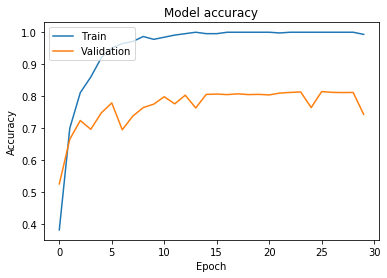

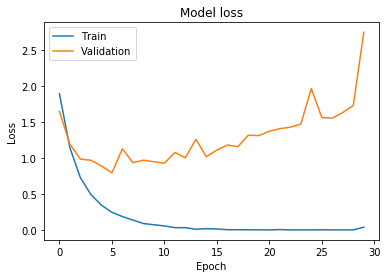

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## First solution: Early stop

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(10)
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
history = model.fit(x_train, y_train, epochs=9, validation_data=(x_validation, y_validation), batch_size=15)

Train on 450 samples, validate on 20000 samples
Epoch 1/9
450/450 [==============================] - 4s 9ms/sample - loss: 2.0230 - accuracy: 0.3111 - val_loss: 1.6971 - val_accuracy: 0.5217
Epoch 2/9
450/450 [==============================] - 3s 6ms/sample - loss: 1.1942 - accuracy: 0.7356 - val_loss: 1.1405 - val_accuracy: 0.6713
Epoch 3/9
450/450 [==============================] - 3s 6ms/sample - loss: 0.6626 - accuracy: 0.8400 - val_loss: 0.9228 - val_accuracy: 0.7193
Epoch 4/9
450/450 [==============================] - 3s 6ms/sample - loss: 0.4468 - accuracy: 0.8867 - val_loss: 0.9652 - val_accuracy: 0.6963
Epoch 5/9
450/450 [==============================] - 3s 6ms/sample - loss: 0.3100 - accuracy: 0.9267 - val_loss: 1.0312 - val_accuracy: 0.7063
Epoch 6/9
450/450 [==============================] - 3s 7ms/sample - loss: 0.2187 - accuracy: 0.9533 - val_loss: 0.7831 - val_accuracy: 0.7832
Epoch 7/9
450/450 [==============================] - 3s 7ms/sample - loss: 0.1578 - accuracy: 

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 - 1s - loss: 0.9608 - accuracy: 0.7559
Test accuracy: 0.7559
Test loss: 0.9607989938259125


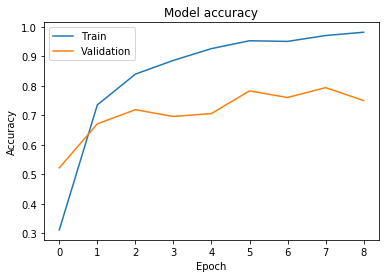

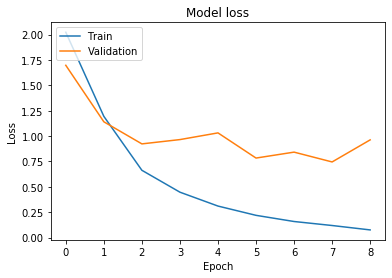

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Second solution: Reduce the complexity of the network

In [17]:
# Let's now build the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation), batch_size=15)

Train on 450 samples, validate on 20000 samples
Epoch 1/30
450/450 [==============================] - 3s 8ms/sample - loss: 1.9039 - accuracy: 0.4378 - val_loss: 1.5971 - val_accuracy: 0.6181
Epoch 2/30
450/450 [==============================] - 2s 5ms/sample - loss: 1.1790 - accuracy: 0.7911 - val_loss: 1.1537 - val_accuracy: 0.7325
Epoch 3/30
450/450 [==============================] - 3s 6ms/sample - loss: 0.7774 - accuracy: 0.8644 - val_loss: 0.9289 - val_accuracy: 0.7591
Epoch 4/30
450/450 [==============================] - 2s 5ms/sample - loss: 0.5556 - accuracy: 0.8933 - val_loss: 0.7899 - val_accuracy: 0.7728
Epoch 5/30
450/450 [==============================] - 2s 5ms/sample - loss: 0.4260 - accuracy: 0.9178 - val_loss: 0.7186 - val_accuracy: 0.7814
Epoch 6/30
450/450 [==============================] - 2s 5ms/sample - loss: 0.3358 - accuracy: 0.9311 - val_loss: 0.6631 - val_accuracy: 0.8030
Epoch 7/30
450/450 [==============================] - 2s 5ms/sample - loss: 0.2747 - acc

In [19]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 - 0s - loss: 0.8094 - accuracy: 0.8216
Test accuracy: 0.8216
Test loss: 0.8094104566439986


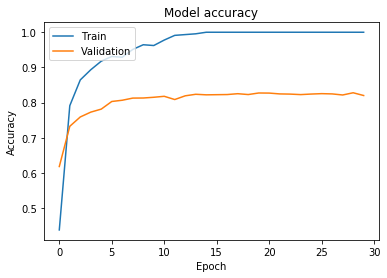

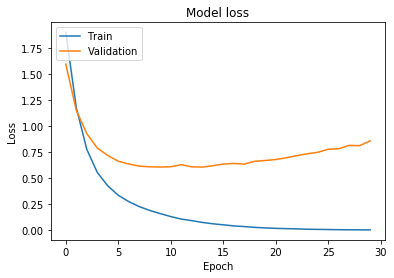

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Third solution: Use dropout

In [21]:
# Let's now build the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),        
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),    
    keras.layers.Dense(10)
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 16)               

In [23]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation), batch_size=15)

Train on 450 samples, validate on 20000 samples
Epoch 1/30
450/450 [==============================] - 4s 9ms/sample - loss: 2.2546 - accuracy: 0.1622 - val_loss: 2.0801 - val_accuracy: 0.3205
Epoch 2/30
450/450 [==============================] - 3s 6ms/sample - loss: 1.9801 - accuracy: 0.2911 - val_loss: 1.8100 - val_accuracy: 0.4281
Epoch 3/30
450/450 [==============================] - 4s 8ms/sample - loss: 1.7937 - accuracy: 0.3600 - val_loss: 1.6272 - val_accuracy: 0.4776
Epoch 4/30
450/450 [==============================] - 3s 7ms/sample - loss: 1.6837 - accuracy: 0.3800 - val_loss: 1.5294 - val_accuracy: 0.5339
Epoch 5/30
450/450 [==============================] - 3s 7ms/sample - loss: 1.5238 - accuracy: 0.4600 - val_loss: 1.3895 - val_accuracy: 0.5346
Epoch 6/30
450/450 [==============================] - 3s 7ms/sample - loss: 1.4488 - accuracy: 0.4711 - val_loss: 1.3158 - val_accuracy: 0.6334
Epoch 7/30
450/450 [==============================] - 5s 11ms/sample - loss: 1.3331 - ac

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 - 1s - loss: 0.8912 - accuracy: 0.8258
Test accuracy: 0.8258
Test loss: 0.891159076166153


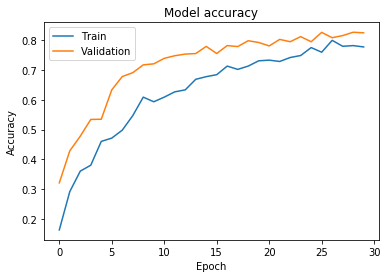

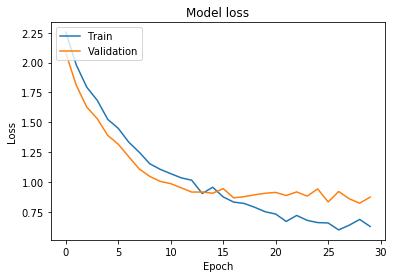

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()